## 1. DATA PREPROCESSING

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import pickle

## READ DATA

In [2]:
data = pd.read_csv("Iris.csv")

## TOP 5 ROWS

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Categories in Target features

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Describing The DataSet

In [5]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## Complete Information Of the Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Removing the unneeded column

In [7]:
data.drop(columns = 'Id', inplace = True)

## Checking if there are any missing values


In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. DATA ANALYSIS

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

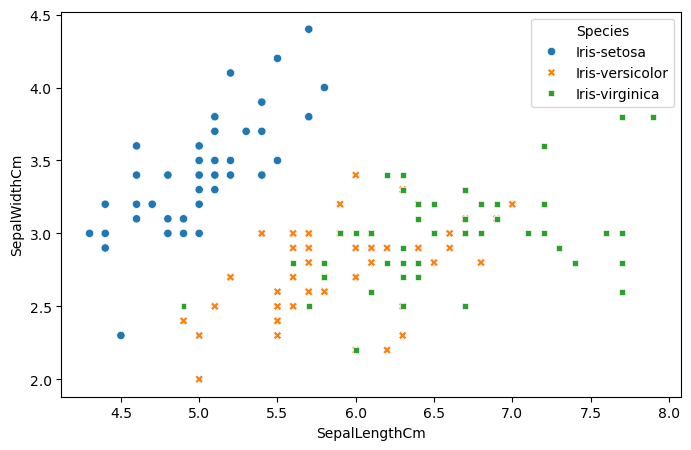

In [9]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = data, x = 'SepalLengthCm', y = 'SepalWidthCm', hue='Species', style='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

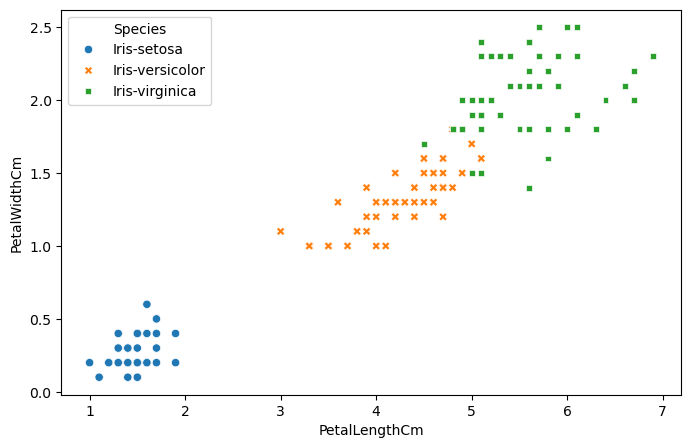

In [10]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = data, x = 'PetalLengthCm', y = 'PetalWidthCm', hue='Species', style='Species')

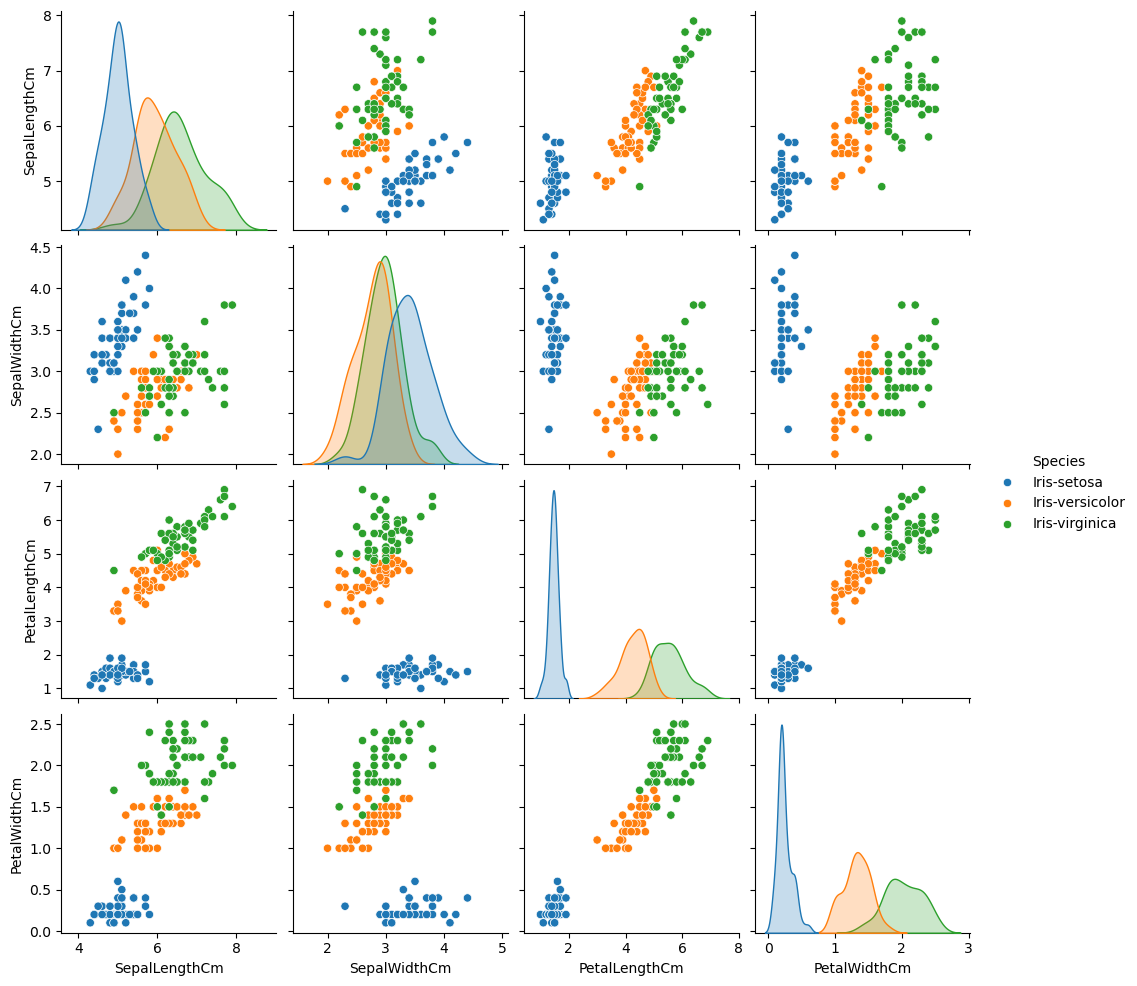

In [11]:
sns.pairplot(data,hue="Species")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

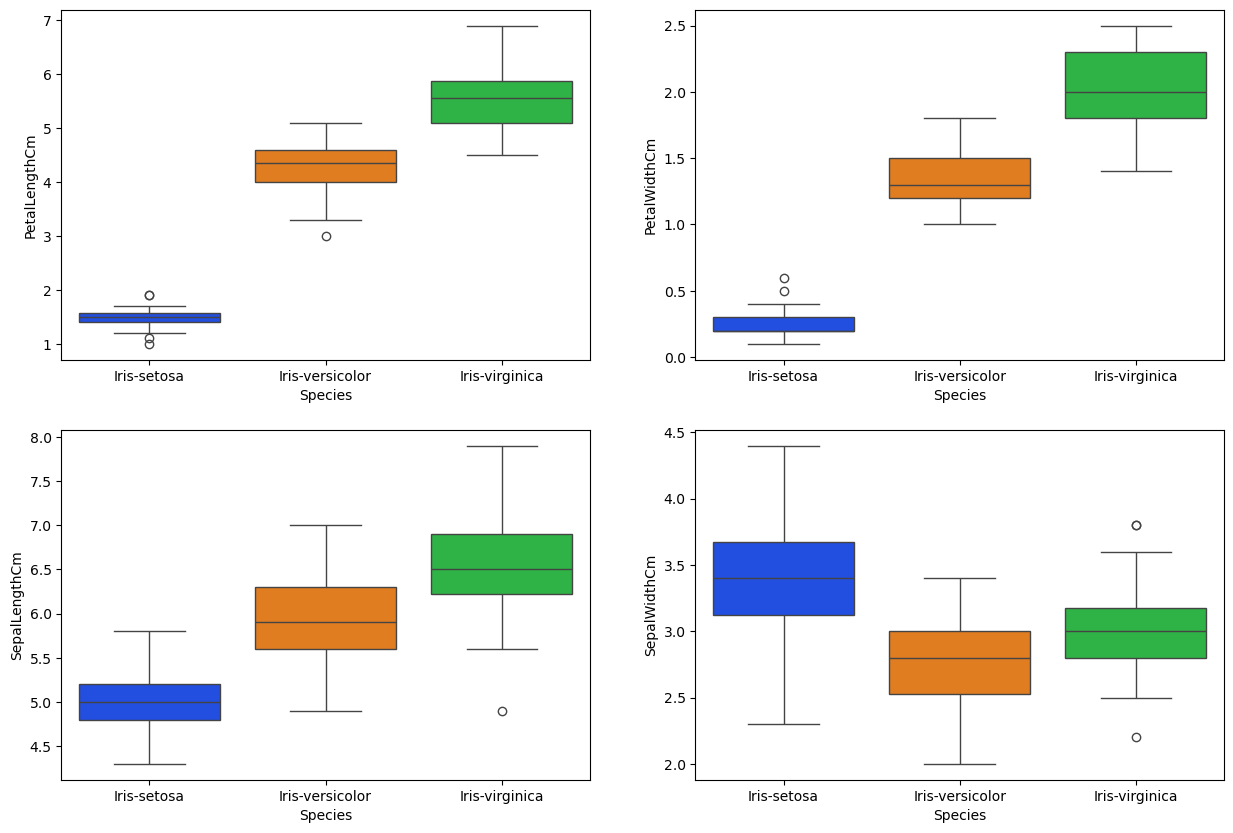

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=data, palette = 'bright')
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=data, palette = 'bright')
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=data, palette = 'bright')
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=data, palette = 'bright')

Text(0.5, 1.0, 'Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers')

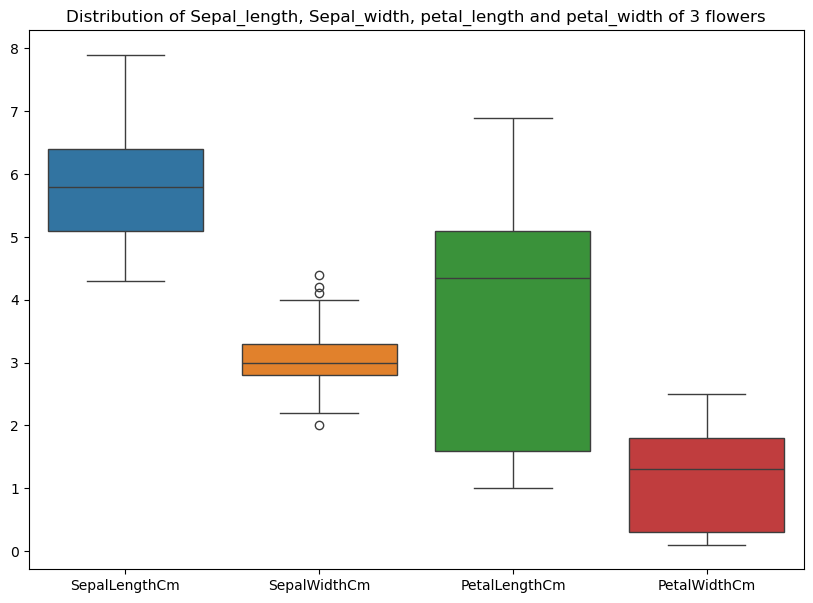

In [13]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=data).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

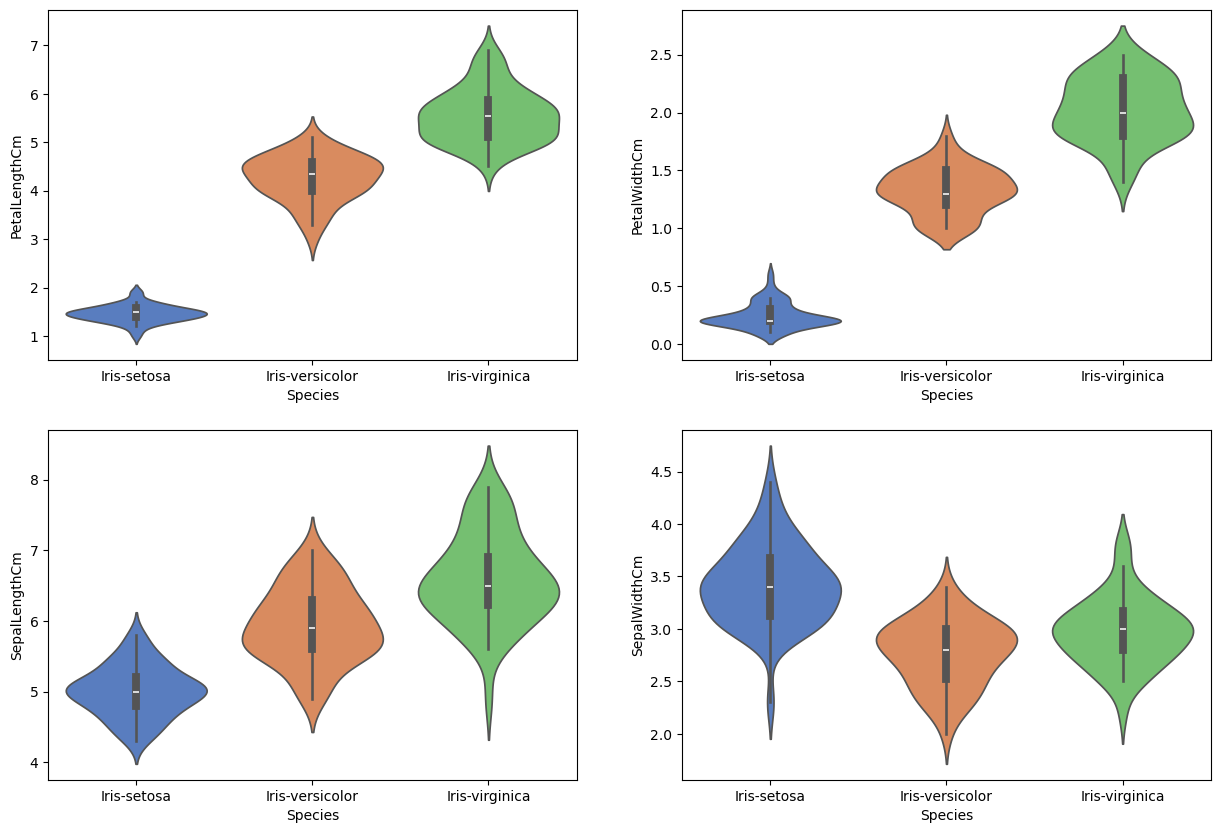

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm', data=data, palette = 'muted')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm', data=data, palette = 'muted')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm', data=data, palette = 'muted')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm', data=data, palette = 'muted')

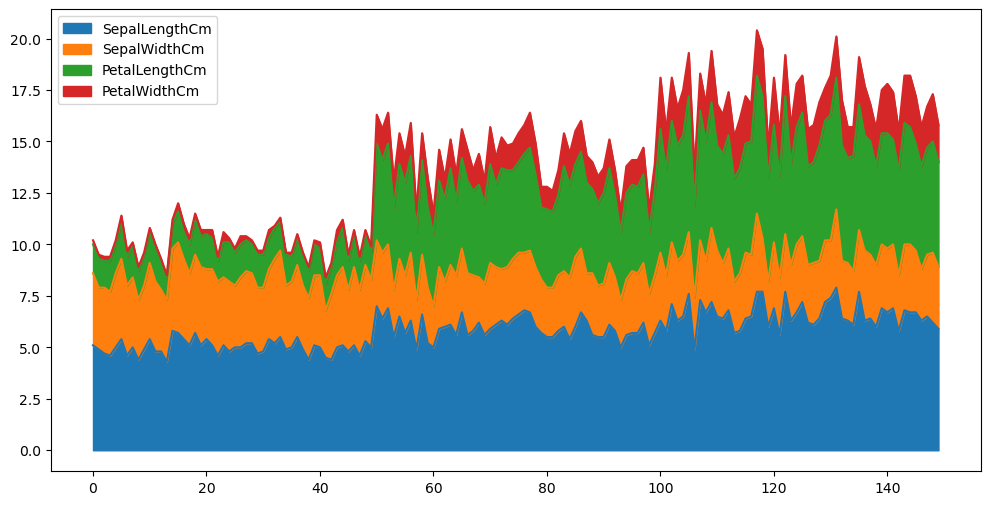

In [15]:
data.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],figsize=(12, 6));

## Label Encoding

In [16]:
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [17]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


Text(0.5, 1.0, 'Corelation of attributes (petal length,width and sepal length,width) among Iris species')

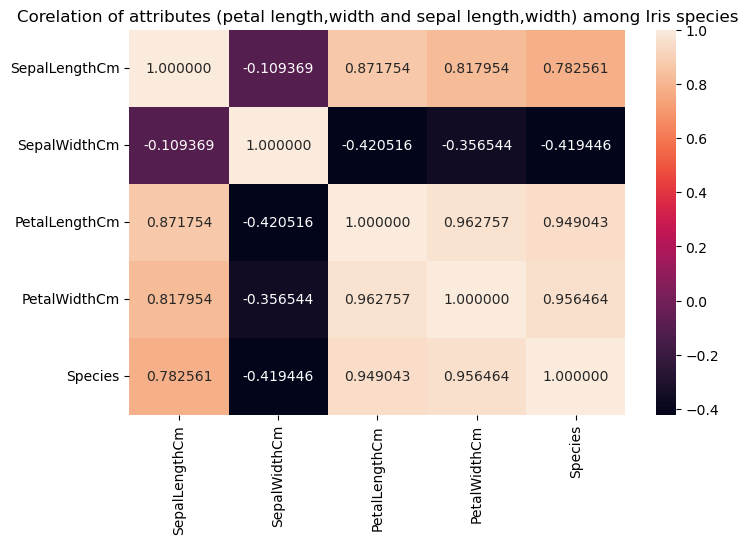

In [18]:
plt.subplots(figsize = (8,5))
sns.heatmap(data.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")

## 3. Building Machine Learning Models

## Spliting 

In [19]:
#Train and Test split
X = data.drop(columns = 'Species')
y = data['Species']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state = 42)

print("Training Set Size = ", X_train.shape)
print("Testing Set Size = ", X_test.shape)
print("CV Set Size = ", X_cv.shape)

Training Set Size =  (120, 4)
Testing Set Size =  (15, 4)
CV Set Size =  (15, 4)


## KNN

optimal k for which auc is maximum :  3


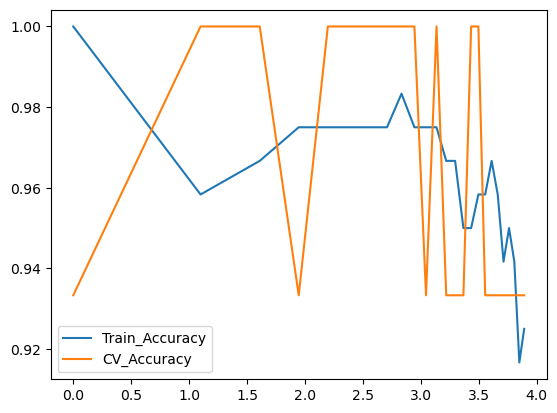

In [20]:
k = list(range(1,50,2))

train_accuracy = []
cv_accuracy = []

for i in k :
    knn = knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_train_pred = knn.predict(X_train)
    y_cv_pred = knn.predict(X_cv)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))

optimal_k = k[cv_accuracy.index(max(cv_accuracy))]

k_log = [math.log(x) for x in k]
print('optimal k for which auc is maximum : ',optimal_k)

plt.plot(k_log, train_accuracy, label = "Train_Accuracy")
plt.plot(k_log, cv_accuracy, label = "CV_Accuracy")
plt.legend()

Error saving model with Pickle: name 'model' is not defined
Train_Accuracy :  0.9583333333333334
Test_Accuracy :  1.0
Cv_Accuracy :  1.0
--------------------------------


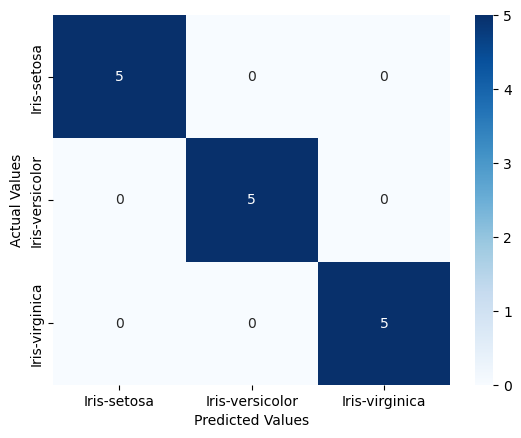

In [21]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)

knn.fit(X_train, y_train)

try:
    with open("model.pkl", "wb") as file:
        pickle.dump(model, file)
    print("Model saved successfully using Pickle!")
except Exception as e:
    print(f"Error saving model with Pickle: {e}")

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

col = ['Model', 'Train_Accuracy', 'Test_Accuracy']
batch1 = pd.DataFrame([['KNN', train_accuracy, test_accuracy]], columns=col)

In [22]:
class_names = le.classes_
original = []
for i in y_test[:8] :
    original.append(class_names[i])
    
predicted = knn.predict(X_test[:8])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa


## Naive Bayes Using GridSearch

Train_Accuracy :  0.9583333333333334
Test_Accuracy :  0.9333333333333333
--------------------------------


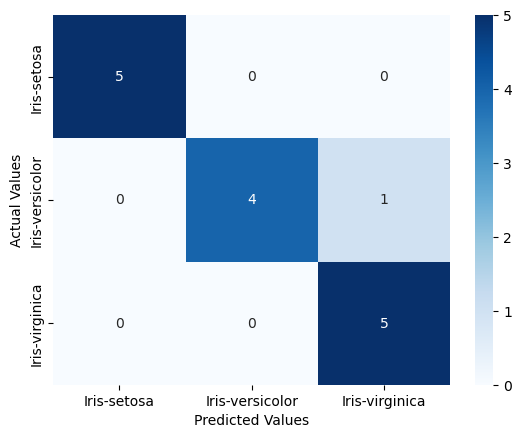

In [23]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_test_pred = gaussian.predict(X_test) 
y_train_pred = gaussian.predict(X_train) 


test_accuracy = accuracy_score(y_test,y_test_pred)
train_accuracy = accuracy_score(y_train,y_train_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)


print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch2 = pd.DataFrame([['Navive Bayes', train_accuracy, test_accuracy]], columns=col)

In [24]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = gaussian.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


## Logistic Regression {L1}

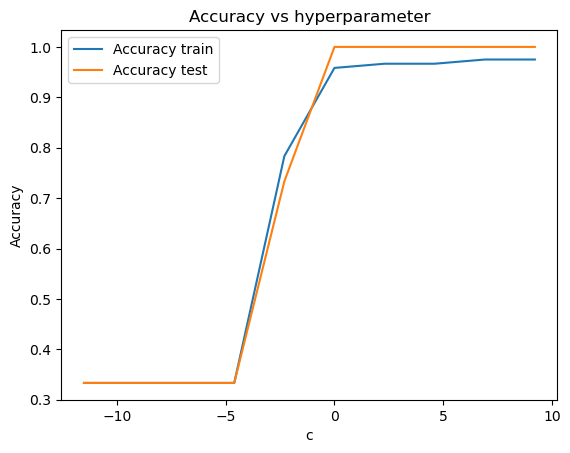

optimal c for which auc is maximum :  10000


In [25]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy = []
cv_accuracy = []

for i in c :
    log = LogisticRegression(penalty = 'l1', C = i, solver = 'liblinear')
    log.fit(X_train,y_train)
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_accuracy, label='Accuracy train')
x.plot(c, cv_accuracy, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)


Train_Accuracy :  0.975
Test_Accuracy :  0.9333333333333333
Cv_Accuracy :  1.0
--------------------------------


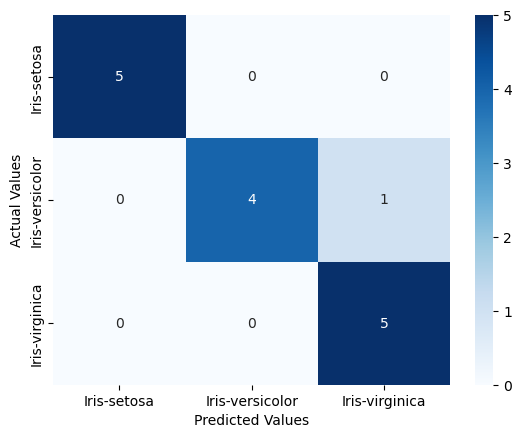

In [26]:
log = LogisticRegression(penalty = 'l1', C = optimal_c, solver = 'liblinear')

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch3 = pd.DataFrame([['LOG L1', train_accuracy, test_accuracy]], columns=col)

In [27]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


##  Logistic Regression {L2}

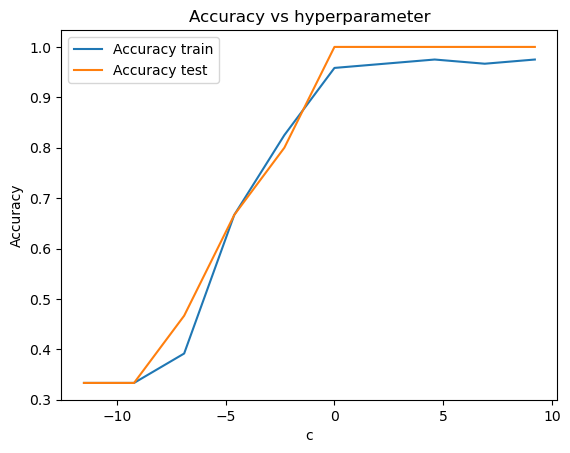

optimal c for which auc is maximum :  10000


In [28]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy = []
cv_accuracy = []

for i in c :
    log = LogisticRegression(penalty = 'l2', C = i, solver = 'liblinear')
    log.fit(X_train,y_train)
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_accuracy, label='Accuracy train')
x.plot(c, cv_accuracy, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)


Train_Accuracy :  0.975
Test_Accuracy :  0.9333333333333333
Cv_Accuracy :  1.0
--------------------------------


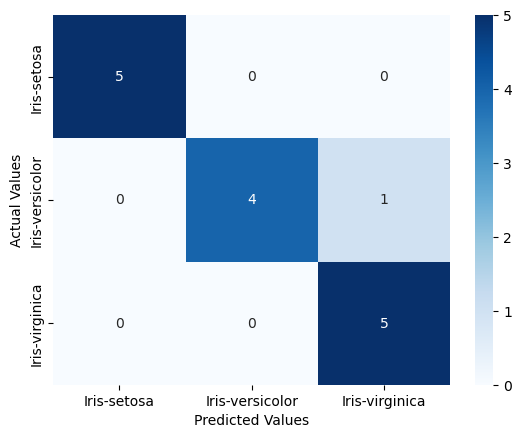

In [29]:
log = LogisticRegression(penalty = 'l2', C = optimal_c, solver = 'liblinear')

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch4 = pd.DataFrame([['LOG L2', train_accuracy, test_accuracy]], columns=col)

In [30]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


## Logistic Regression {L1 & L2}

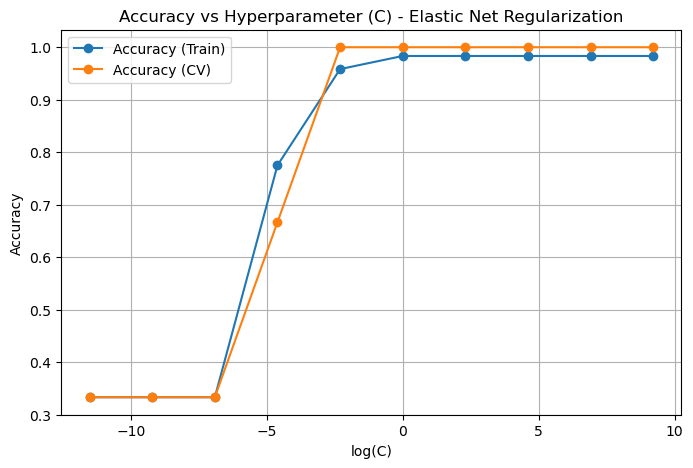

Optimal C for which accuracy is maximum: 10000


In [31]:
c = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

train_accuracy = []
cv_accuracy = []

for i in c:
    log = LogisticRegression(penalty='elasticnet', C=i, solver='saga', l1_ratio=0.5)
    log.fit(X_train, y_train)
    
    # Predictions
    y_cv_pred = log.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    
    y_train_pred = log.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_c = c[cv_accuracy.index(max(cv_accuracy))]

log_c = [math.log(x) for x in c]

plt.figure(figsize=(8, 5))
plt.plot(log_c, train_accuracy, label='Accuracy (Train)', marker='o')
plt.plot(log_c, cv_accuracy, label='Accuracy (CV)', marker='o')
plt.title('Accuracy vs Hyperparameter (C) - Elastic Net Regularization')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print('Optimal C for which accuracy is maximum:', optimal_c)

Train_Accuracy :  0.9833333333333333
Test_Accuracy :  1.0
Cv_Accuracy :  1.0
--------------------------------


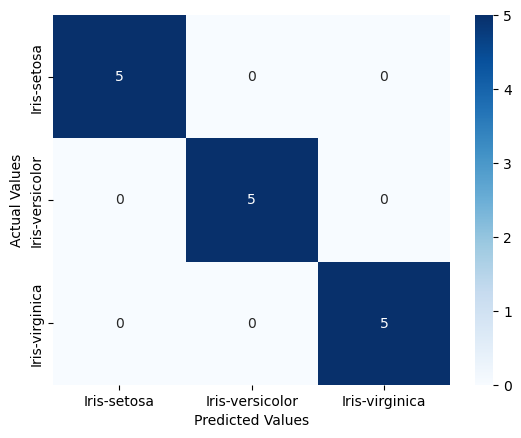

In [32]:
log = LogisticRegression(penalty = 'elasticnet', C = optimal_c, solver = 'saga', l1_ratio = 0.5)

log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)


print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch5 = pd.DataFrame([['LOG L1&L2', train_accuracy, test_accuracy]], columns=col)

In [33]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = log.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


## Decision Tree

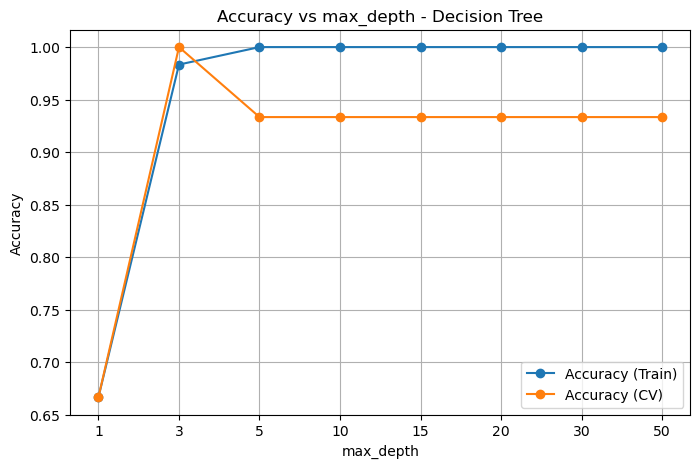

Optimal max_depth for which accuracy is maximum: 3


In [34]:
depth_values = [1, 3, 5, 10, 15, 20, 30, 50]

train_accuracy = []
cv_accuracy = []

for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predictions
    y_cv_pred = tree.predict(X_cv)
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    
    y_train_pred = tree.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

optimal_depth = depth_values[cv_accuracy.index(max(cv_accuracy))]

plt.figure(figsize=(8, 5))
plt.plot([str(d) for d in depth_values], train_accuracy, label='Accuracy (Train)', marker='o')
plt.plot([str(d) for d in depth_values], cv_accuracy, label='Accuracy (CV)', marker='o')
plt.title('Accuracy vs max_depth - Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print('Optimal max_depth for which accuracy is maximum:', optimal_depth)

Train_Accuracy :  0.9833333333333333
Test_Accuracy :  0.9333333333333333
Cv_Accuracy :  1.0
--------------------------------


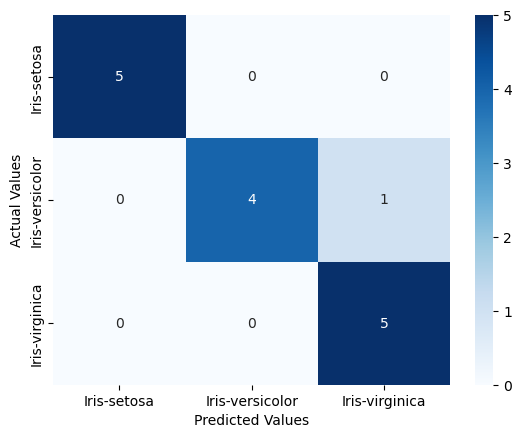

In [35]:
tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
y_cv_pred = tree.predict(X_cv)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

print("Train_Accuracy : ",train_accuracy)
print("Test_Accuracy : ",test_accuracy)
print("Cv_Accuracy : ",cv_accuracy)

print("--------------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch7 = pd.DataFrame([['Decision Tree', train_accuracy, test_accuracy]], columns=col)

In [36]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = tree.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


## Random Forest

In [37]:
dept = [1,5,10,50,100,500,1000]
n_estimators = [20,40,60,80,100,120]

param_grid = {'n_estimators' : n_estimators, 'max_depth': dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, cv = 3)

model.fit(X_train, y_train)

print("Optimal n Estimators : ", model.best_estimator_.n_estimators)
print("Optimal Max Depth : ", model.best_estimator_.max_depth)

Optimal n Estimators :  80
Optimal Max Depth :  1


In [38]:
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

AUC on Test data is 0.9333333333333333
AUC on Train data is 0.9583333333333334
---------------------------


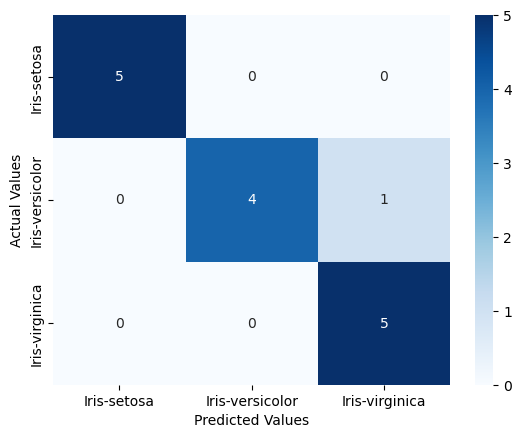

In [39]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train,y_train)

y_test_pred =clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
pred_train = clf.predict(X_train)
train_accuracy =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,y_test_pred)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

class_names = le.classes_
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues",  xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

batch8 = pd.DataFrame([['Random Forest', train_accuracy, test_accuracy]], columns=col)

In [40]:
class_names = le.classes_
original = []
for i in y_test[:10] :
    original.append(class_names[i])
    
predicted = clf.predict(X_test[:10])
pred = []
for j in predicted :
    pred.append(class_names[j])

temp_df = pd.DataFrame(list(zip(original, pred)),columns = ['original_Classlabel', 'predicted_classlebel'])
temp_df

,original_Classlabel,predicted_classlebel
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


## Results

In [41]:
results = pd.DataFrame()
results = pd.concat([results, batch1, batch2, batch3, batch4, batch5, batch7, batch8], ignore_index = True)
results = results.sort_values(by='Test_Accuracy', ascending=False)
results = results.reset_index(drop=True)
results

,Model,Train_Accuracy,Test_Accuracy
0,KNN,0.958333,1.000000
1,LOG L1&L2,0.983333,1.000000
2,Navive Bayes,0.958333,0.933333
3,LOG L1,0.975000,0.933333
4,LOG L2,0.975000,0.933333
5,Decision Tree,0.983333,0.933333
6,Random Forest,0.958333,0.933333


<Axes: xlabel='Test_Accuracy', ylabel='Model'>

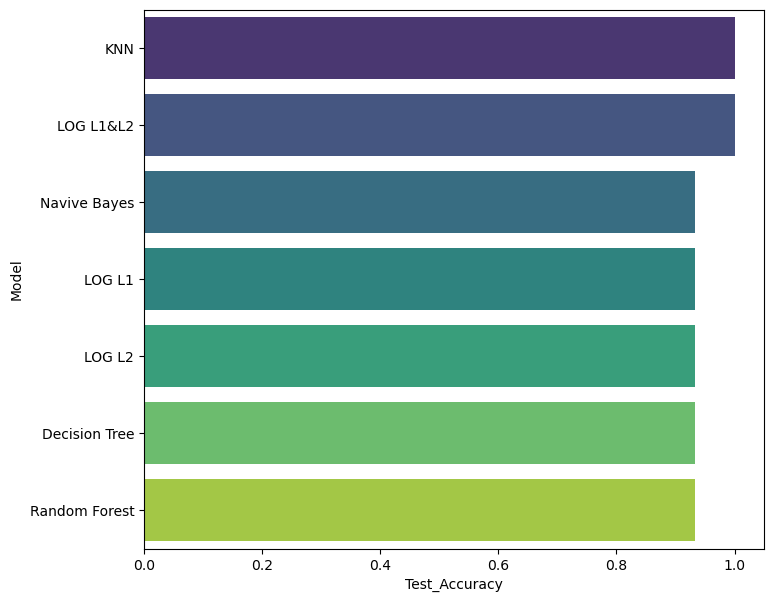

In [43]:
plt.figure(figsize = (8,7))
sns.barplot(data = results, y = 'Model', x = 'Test_Accuracy', palette = 'viridis')